<a href="https://colab.research.google.com/github/Ibrahim-Ehab/COVID-19_detection_using-CNN/blob/main/Copy_of_COVID_19_Detiction_Using_CNN_DenseNet_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID-19 Detictor using DenseNet-CNN pretraind

Link for used dataset:

[COVID-19 Dataset](https://drive.google.com/drive/folders/1HbFUthVwqm3jijluMhTWuf0URdbKk1ol?usp=sharing)


In [1]:
# Upload google drive in our COLAB

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 32.4 MB/s 


In [3]:
# install tensorflow version 2
%tensorflow_version 2.x


In [4]:
# Importing libraries

import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [5]:
# Create paths for train & test

train_loc = '/content/drive/My Drive/COVID-19 Dataset/Train/'
test_loc = '/content/drive/My Drive/COVID-19 Dataset/Test/'

In [6]:
# image preparation (resize)

trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

traindata = trdata.flow_from_directory(directory = train_loc, target_size = (224,224))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

testdata = tsdata.flow_from_directory(directory = test_loc, target_size = (224,224))


Found 1400 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


## Show lables of Classification

In [7]:
traindata.class_indices

{'+ COVID-19': 0, '- COVID-19': 1}

# CNN Architectuer
####1-Input Layer
####2-Four Convolution layers
####3-DenseNet layer

In [9]:
densenet=tensorflow.keras.applications.densenet.DenseNet201(
    include_top=True,
    weights='imagenet',
)
out=densenet.output
out=Flatten(name='flatten')(out)
out=Dropout(.5)(out)
out=Dense(2,activation='softmax')(out)
model=Model(inputs=densenet.input,outputs=out)
for layer in densenet.layers:
  layer.trainable=False
  


82534400/82524592 [==============================] - 0s 0us/step


#Show our CNN structure for each layer

In [10]:
# Print network structure
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [11]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [12]:
# Compiling the model
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

# Let's begin our training and show the accuracy we get after each epoch

In [13]:
# start Train/Test
batch_size = 32
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,validation_steps = testdata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
43/43 [==============================] - 376s 8s/step - loss: 0.6888 - accuracy: 0.6301 - val_loss: 0.6840 - val_accuracy: 0.8795
Epoch 2/10
43/43 [==============================] - 68s 2s/step - loss: 0.6814 - accuracy: 0.8289 - val_loss: 0.6751 - val_accuracy: 0.8951
Epoch 3/10
43/43 [==============================] - 67s 2s/step - loss: 0.6750 - accuracy: 0.8467 - val_loss: 0.6669 - val_accuracy: 0.9040
Epoch 4/10
43/43 [==============================] - 67s 2s/step - loss: 0.6654 - accuracy: 0.8808 - val_loss: 0.6593 - val_accuracy: 0.9286
Epoch 5/10
43/43 [==============================] - 67s 2s/step - loss: 0.6598 - accuracy: 0.9101 - val_loss: 0.6503 - val_accuracy: 0.9174
Epoch 6/10
43/43 [==============================] - 67s 2s/step - loss: 0.6525 - accuracy: 0.8904 - val_loss: 0.6427 - val_accuracy: 0.9129
Epoch 7/10
43/43 [==============================] - 67s 2s/step - loss: 0.6456 - accuracy: 0.9152 - val_loss: 0.6351 - val_accuracy: 0.9129
Epoch 8/10
43/43 [=

#Visualization for brevious results 
#####1- Loss VS Validation Loss
#####2- Accuracy VS Validation Accuracy

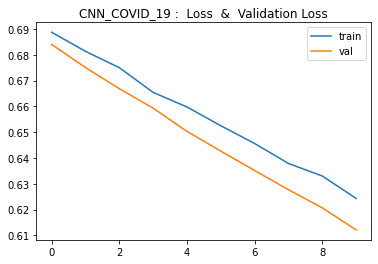

In [14]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_COVID_19 :  Loss  &  Validation Loss')
plt.legend()
plt.show()

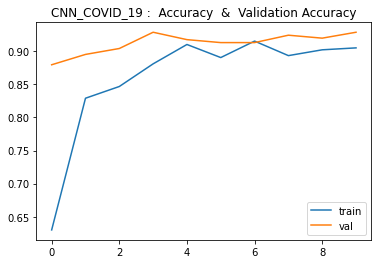

In [15]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_COVID_19 :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

#Visualization of Confusion Matrix 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[103 127]
 [103 127]]
classification_Report
              precision    recall  f1-score   support

      COVID+       0.50      0.45      0.47       230
      COVID-       0.50      0.55      0.52       230

    accuracy                           0.50       460
   macro avg       0.50      0.50      0.50       460
weighted avg       0.50      0.50      0.50       460



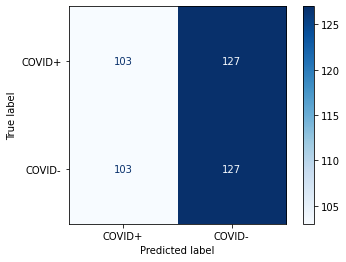

In [16]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['COVID+', 'COVID-']
label_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(testdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('classification_Report')
print(classification_report(testdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()


####This notebook made by:
    1-Ibrahim Ehab Abdelmaged
